<h3>Introduction</h3>
<p>We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.</p>

<h3>Data Description</h3>
<p>The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. All customer information that might reveal personal information is removed due to privacy concerns.</p>


<h3> Problem Statement</h3>
<p>Predict if a customer will subscribe to a term deposit or not. We are also looking what features influence a customer decision to buy and what segments should we focus on to increase more subscription</p>

In [1]:
# Imort required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

C:\Users\cp_mu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cp_mu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\cp_mu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Read the datfile into a Pandas dataframe
df=pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [4]:
# Datatypes of the feature variables
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

Categorical Variables = job, marital, education, default,'housing',loan, contact, month

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [136]:
# Display the unique values and counts of the categorical variables
cat_col=['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month','y']
for i in cat_col:
    print("Column Name:",i)
    print(df[i].value_counts())
    print('')

Column Name: job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

Column Name: marital
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

Column Name: education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

Column Name: default
no     39191
yes      809
Name: default, dtype: int64

Column Name: housing
yes    24031
no     15969
Name: housing, dtype: int64

Column Name: loan
no     33070
yes     6930
Name: loan, dtype: int64

Column Name: contact
cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

Column Name: month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar     

In [7]:
# Check for if any null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [11]:
# Distribution of Target variable
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

<p>The data set is very imbalanced as the number of Yes = 2896 and NO= 37104</p>

<h3> Data Analysis </h3>

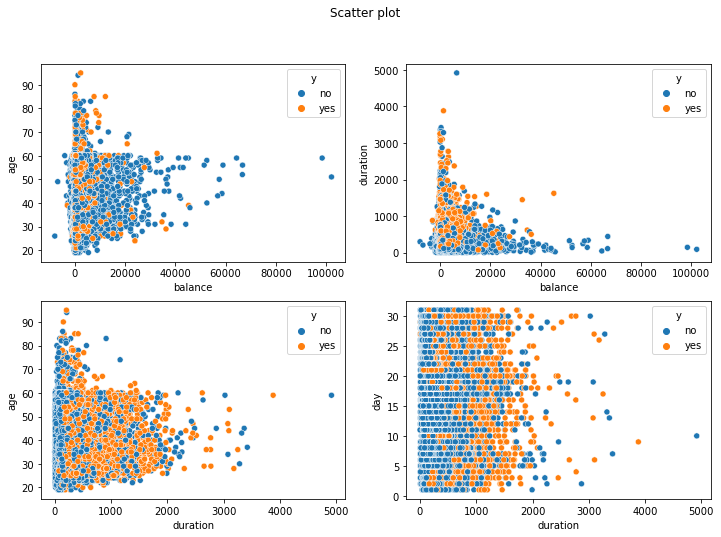

In [235]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.scatterplot(ax=ax[0,0],data=df,y='age',x='balance',hue='y')
sns.scatterplot(ax=ax[0,1],data=df,y='duration',x='balance',hue='y')
sns.scatterplot(ax=ax[1,0],data=df,y='age',x='duration',hue='y')
sns.scatterplot(ax=ax[1,1],data=df,y='day',x='duration',hue='y')
fig.suptitle("Scatter plot")
plt.show()


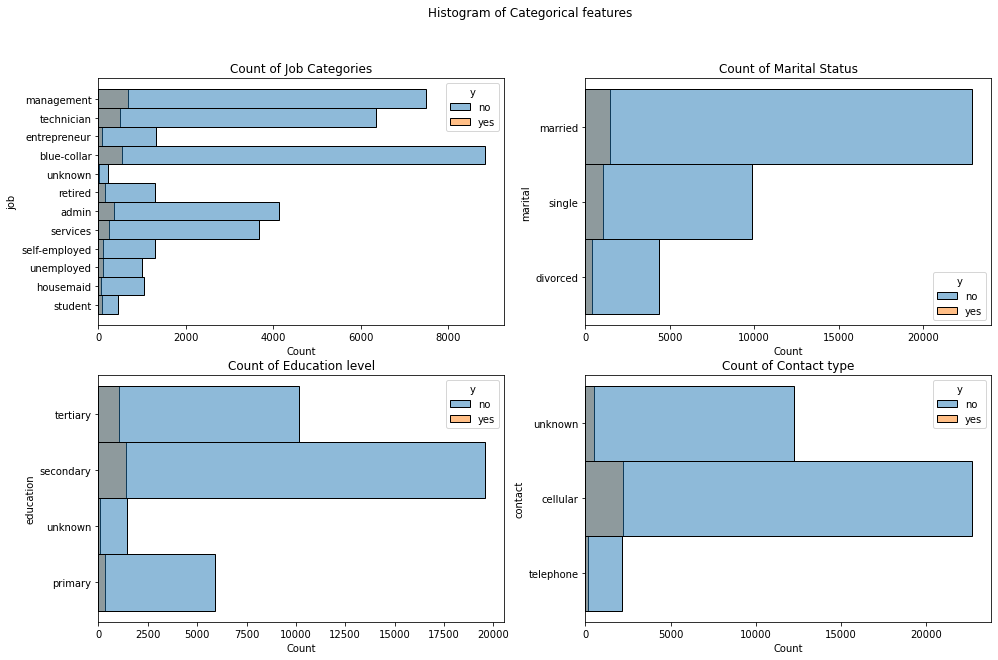

In [236]:
# Plot the various categorical features
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.histplot(ax=ax[0,0],data=df,y='job',hue='y').set(title='Count of Job Categories')
sns.histplot(ax=ax[0,1],data=df,y='marital',hue='y').set(title='Count of Marital Status')
sns.histplot(ax=ax[1,0],data=df,y='education',hue='y').set(title='Count of Education level')
sns.histplot(ax=ax[1,1],data=df,y='contact',hue='y').set(title='Count of Contact type')
fig.suptitle("Histogram of Categorical features")
plt.show()

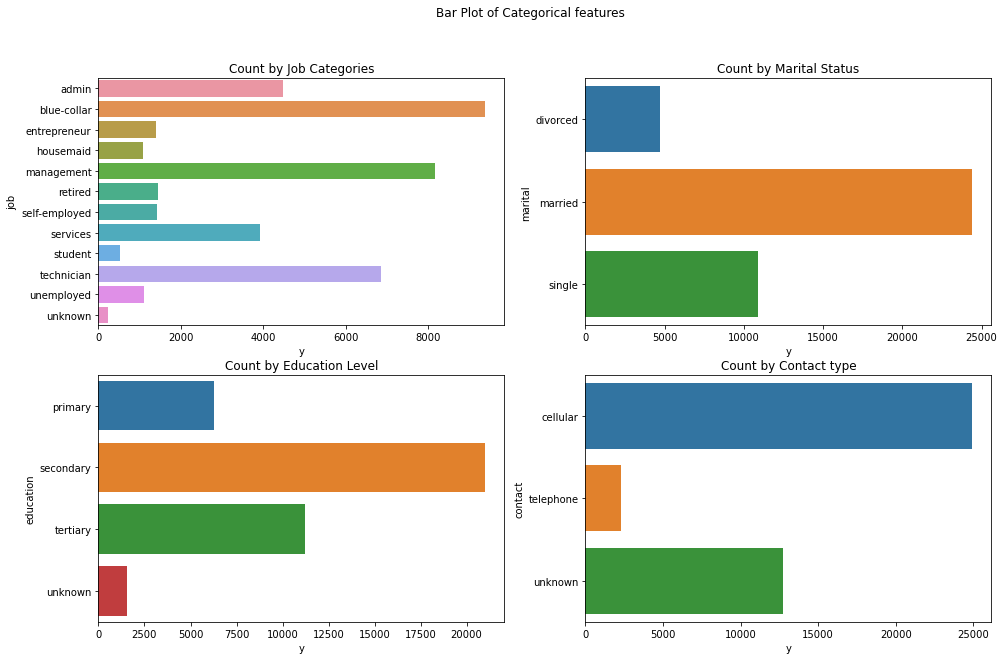

In [237]:
# sns.barplot(data=df[['y']].groupby(df['job']).count().reset_index(),y='job',x='y')
# Plot the various categorical features
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.barplot(ax=ax[0,0],data=df[['y']].groupby(df['job']).count().reset_index(),y='job',x='y').set(title='Count by Job Categories')
sns.barplot(ax=ax[0,1],data=df[['y']].groupby(df['marital']).count().reset_index(),y='marital',x='y').set(title='Count by Marital Status')
sns.barplot(ax=ax[1,0],data=df[['y']].groupby(df['education']).count().reset_index(),y='education',x='y').set(title='Count by Education Level')
sns.barplot(ax=ax[1,1],data=df[['y']].groupby(df['contact']).count().reset_index(),y='contact',x='y').set(title='Count by Contact type')
fig.suptitle("Bar Plot of Categorical features")
plt.show()


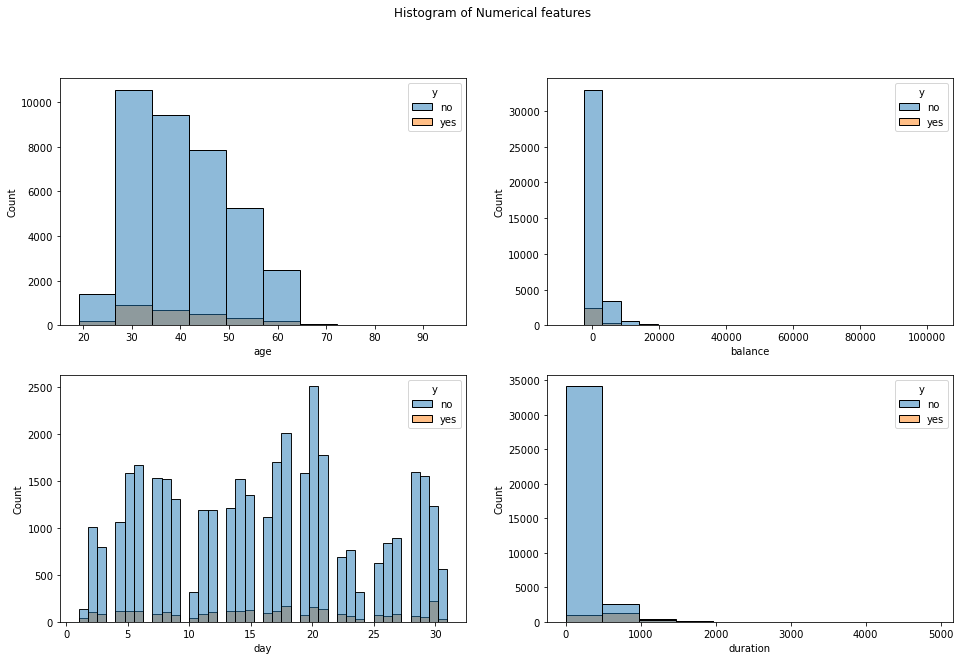

In [238]:
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.histplot(ax=ax[0,0],data=df,x='age',bins=10,stat='count',hue='y')
sns.histplot(ax=ax[0,1],data=df,x='balance',bins=20,hue='y')
sns.histplot(ax=ax[1,0],data=df,x='day',hue='y')
sns.histplot(ax=ax[1,1],data=df,x='duration',bins=10,hue='y')
fig.suptitle("Histogram of Numerical features")
plt.show()

Text(0.5, 0.98, 'Pair plot')

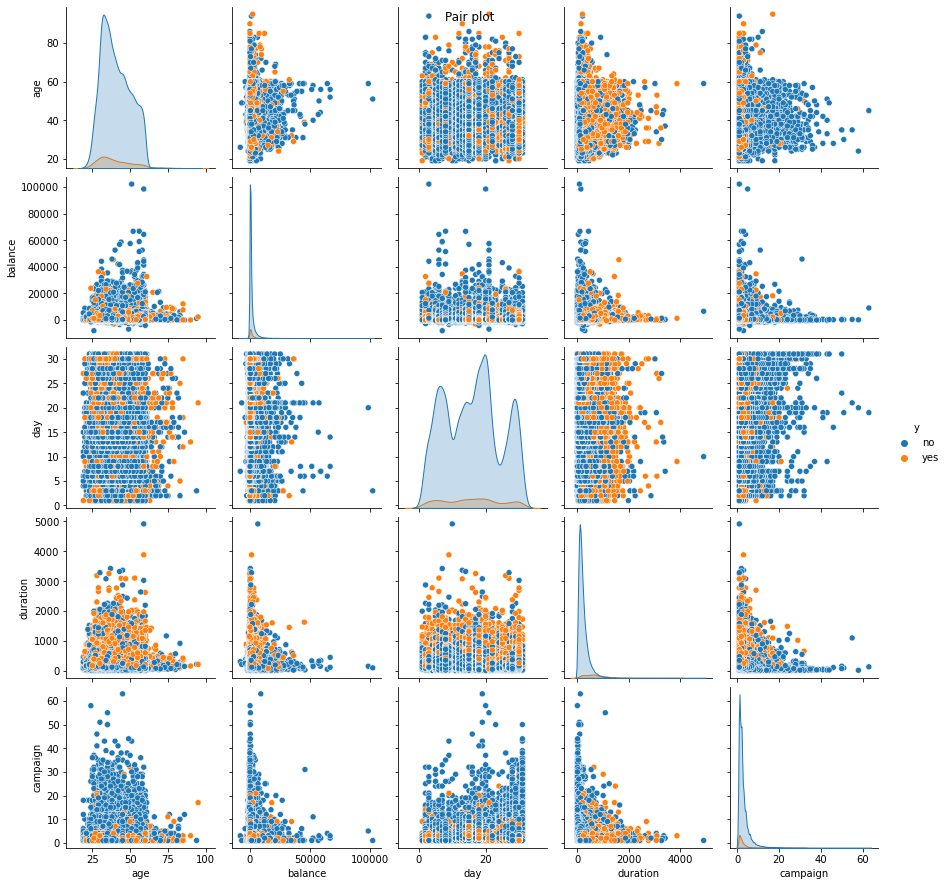

In [234]:
sns.pairplot(df,hue='y')

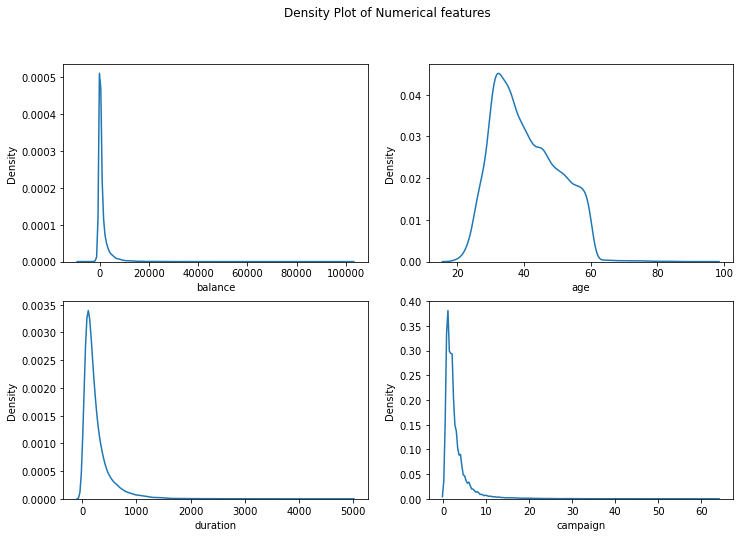

In [239]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(ax=ax[0,0],data=df,x='balance')
sns.kdeplot(ax=ax[0,1],data=df,x='age')
sns.kdeplot(ax=ax[1,0],data=df,x='duration')
sns.kdeplot(ax=ax[1,1],data=df,x='campaign')
fig.suptitle("Density Plot of Numerical features")
plt.show()


<AxesSubplot:>

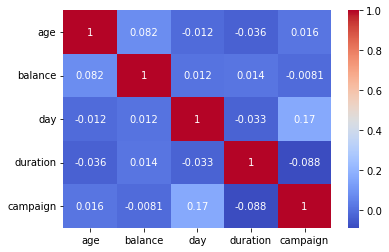

In [143]:
# Correlation matrix heat map
corr_mat=X.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

#### Observations
*  People in age group 50-60 has more balance
*  No strong correlation between Numerical features

### Model 

In [67]:
# Separate the Target feature 'y' and the dependent features
X=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign']]
Y=df['y']

In [216]:
# One Hot Encoding 
# Apply one hot encdoing for all the categorical variables 
# Convert the columns to 'int64'
# Drop the existing Categorical columns from original dataframe and add the encoded dataframe to the original dataframe

cat_col=['job', 'marital', 'education','contact','default','housing','loan']
ohe=OneHotEncoder(drop='if_binary')
S_ohe=ohe.fit_transform(X[cat_col]).toarray().astype("int64")
X_ohe=pd.DataFrame(S_ohe,columns=ohe.get_feature_names_out())
X_ohe=pd.concat([X.drop(cat_col,axis=1),X_ohe],axis=1)
X_ohe.head()



,age,balance,day,month,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_yes,housing_yes,loan_yes
0,58,2143,5,may,261,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,44,29,5,may,151,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,33,2,5,may,76,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,1
3,47,1506,5,may,92,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,33,1,5,may,198,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [217]:
# Convert the Month to numerical vairable using a function, applied to the 'Month' column
def conv_month(x):
    if x=='jan':
        x=1
    elif x=='feb':
        x=2
    elif x=='mar':
        x=3
    elif x=='apr':
        x=4
    elif x=='may':
        x=5
    elif x=='jun':
        x=6
    elif x=='jul':
        x=7
    elif x=='aug':
        x=8
    elif x=='sep':
        x=9
    elif x=='oct':
        x=10
    elif x=='nov':
        x=11
    elif x=='dec':
        x=12
    return x

In [218]:
X_ohe['month']=X_ohe['month'].apply(conv_month).astype('int64')

In [219]:
# Display all numerical columns after applying encoding
X_ohe.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

In [220]:
# Check all columns are numerical
X_ohe.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
job_admin              int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
marital_divorced       int64
marital_married        int64
marital_single         int64
education_primary      int64
education_secondary    int64
education_tertiary     int64
education_unknown      int64
contact_cellular       int64
contact_telephone      int64
contact_unknown        int64
default_yes            int64
housing_yes            int64
loan_yes               int64
dtype: object

In [221]:
# Scale the data 
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [225]:
# Random Forest Classifier
rfd=RandomForestClassifier(random_state=42)
rfd.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [226]:
rfd.score(X_train,y_train)

1.0

In [227]:
rfd.score(X_test,y_test)

0.936